Fonte de dados: https://sig.tse.jus.br/ords/dwapr/seai/r/sig-eleicao-resultados/conjuntos-de-dados

Os dados foram exportados foram:
 - Métricas: Quantidade de votos nominais
 - Dimensões: UF, Município, Número do candidato
 - Tipo de Arquivo: CSV (en-US)

In [26]:
import pandas as pd
import numpy as np

In [30]:
# Dados primeiro turno
df_raw_first_round = pd.read_csv('data/raw-first-round.csv')
print(df_raw_first_round.shape)
print(df_raw_first_round.dtypes)
display(df_raw_first_round[df_raw_first_round['nm_municipio'] == 'ARARANGUÁ'])

(63261, 5)
sg_uf                object
nm_municipio         object
nr_candidato          int64
qt_votos_nominais     int64
dt_carga             object
dtype: object


,sg_uf,nm_municipio,nr_candidato,qt_votos_nominais,dt_carga
48730,SC,ARARANGUÁ,12,1009,2022-11-25 18:45:37
48731,SC,ARARANGUÁ,13,11852,2022-11-25 18:45:37
48732,SC,ARARANGUÁ,14,37,2022-11-25 18:45:37
48733,SC,ARARANGUÁ,15,1516,2022-11-25 18:45:37
48734,SC,ARARANGUÁ,16,11,2022-11-25 18:45:37
48735,SC,ARARANGUÁ,21,15,2022-11-25 18:45:37
48736,SC,ARARANGUÁ,22,25630,2022-11-25 18:45:37
48737,SC,ARARANGUÁ,27,4,2022-11-25 18:45:37
48738,SC,ARARANGUÁ,30,345,2022-11-25 18:45:37
48739,SC,ARARANGUÁ,44,110,2022-11-25 18:45:37


In [28]:
# Dados segundo turno
df_raw_second_round = pd.read_csv('data/raw-second-round.csv')
print(df_raw_second_round.shape)
print(df_raw_second_round.dtypes)
display(df_raw_second_round[df_raw_second_round['nm_municipio'] == 'ARARANGUÁ'])

(11502, 5)
sg_uf                object
nm_municipio         object
nr_candidato          int64
qt_votos_nominais     int64
dt_carga             object
dtype: object


,sg_uf,nm_municipio,nr_candidato,qt_votos_nominais,dt_carga
8860,SC,ARARANGUÁ,13,12522,2022-11-25 18:45:37
8861,SC,ARARANGUÁ,22,28631,2022-11-25 18:45:37


In [29]:
# Junção em uma tabela apenas

df_first_round = (df_raw_first_round
	.drop(['dt_carga'], axis=1)
	.rename(columns={'qt_votos_nominais': 'qt_votos_primeiro_turno'}))

df_second_round = (df_raw_second_round
	.drop(['dt_carga'], axis=1)
	.rename(columns={'qt_votos_nominais': 'qt_votos_segundo_turno'}))

df_votes = pd.merge(df_first_round, df_second_round, how='left')
df_votes['qt_votos_segundo_turno'] = (df_votes['qt_votos_segundo_turno']
	.fillna(0)
	.astype(np.int64))

print(df_votes.shape)
print(df_votes.dtypes)
display(df_votes[df_votes['nm_municipio'] == 'ARARANGUÁ'])



(63261, 5)
sg_uf                      object
nm_municipio               object
nr_candidato                int64
qt_votos_primeiro_turno     int64
qt_votos_segundo_turno      int64
dtype: object


,sg_uf,nm_municipio,nr_candidato,qt_votos_primeiro_turno,qt_votos_segundo_turno
48730,SC,ARARANGUÁ,12,1009,0
48731,SC,ARARANGUÁ,13,11852,12522
48732,SC,ARARANGUÁ,14,37,0
48733,SC,ARARANGUÁ,15,1516,0
48734,SC,ARARANGUÁ,16,11,0
48735,SC,ARARANGUÁ,21,15,0
48736,SC,ARARANGUÁ,22,25630,28631
48737,SC,ARARANGUÁ,27,4,0
48738,SC,ARARANGUÁ,30,345,0
48739,SC,ARARANGUÁ,44,110,0


In [35]:
# Salvando os dados

# df_votes.to_csv('data/votes.csv')

# Exploração dos dados

<AxesSubplot: title={'center': 'Votos por estado'}, xlabel='Estados', ylabel='Votos (em milhões)'>

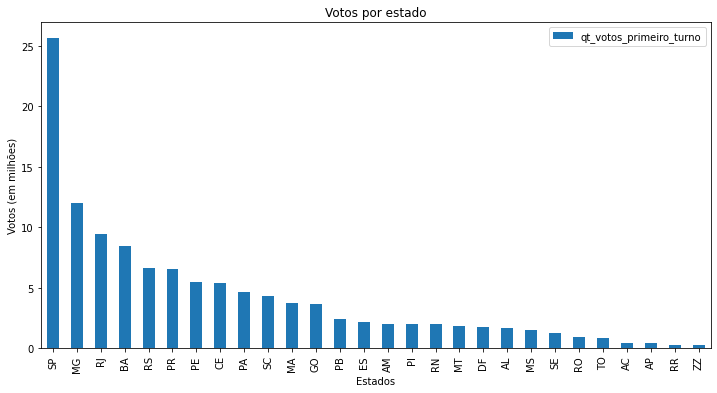

In [110]:
import matplotlib.pyplot as plt

votes_by_state = ((df_votes
	.groupby(['sg_uf'])[['qt_votos_primeiro_turno']]
	.sum()
	.sort_values(by='qt_votos_primeiro_turno', ascending=False)) / 10**6)

votes_by_state.plot(
	kind='bar',
	title='Votos por estado',
	ylabel='Votos (em milhões)',
	xlabel='Estados',
	legend=None,
	figsize=(12, 6)
)


<AxesSubplot: title={'center': 'Votos por estado'}, xlabel='Estados', ylabel='Votos (em milhões)'>

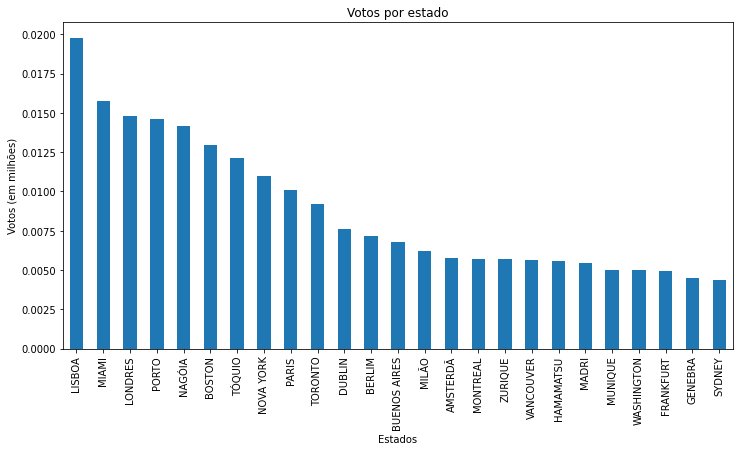

In [119]:
votes_outsize_brasil = ((df_votes[df_votes['sg_uf'] == 'ZZ']
	.groupby(['nm_municipio'])[['qt_votos_primeiro_turno']]
	.sum()
	.sort_values(by='qt_votos_primeiro_turno', ascending=False)
	.head(25)) / 10**6)

votes_outsize_brasil.plot(
	kind='bar',
	title='Votos por estado',
	ylabel='Votos (em milhões)',
	xlabel='Estados',
	legend=None,
	figsize=(12, 6)
)
